# Mirai ML System

## Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import joblib
from sklearn.preprocessing import LabelEncoder

from functions_ml import *
model_repo = ".\\Mirai_model\\"
file_path = '.\Files\\Mirai\\'

## Preprocessing data for binary classification (Recon or Benign)

### Import basic datasets

In [2]:
train_sets, test_sets = get_train_and_test_files()
print(len(train_sets), len(test_sets))

X_columns = x_columns(read_csv_file(train_sets[0]))
y_column = 'label'

135 34


### Scaling

In [3]:
scaler = get_or_define_and_save_scaler(model_repo, train_sets, X_columns)

### Dictionnary for spliting data

In [4]:
dict_3_classes = {}
dict_3_classes['Mirai-greeth_flood'] = 'Mirai'
dict_3_classes['Mirai-greip_flood'] = 'Mirai'
dict_3_classes['Mirai-udpplain'] = 'Mirai'

dict_3_classes['BenignTraffic'] = 'Benign'

dict_3_classes['DDoS-RSTFINFlood'] = 'Other'
dict_3_classes['DDoS-PSHACK_Flood'] = 'Other'
dict_3_classes['DDoS-SYN_Flood'] = 'Other'
dict_3_classes['DDoS-UDP_Flood'] = 'Other'
dict_3_classes['DDoS-TCP_Flood'] = 'Other'
dict_3_classes['DDoS-ICMP_Flood'] = 'Other'
dict_3_classes['DDoS-SynonymousIP_Flood'] = 'Other'
dict_3_classes['DDoS-ACK_Fragmentation'] = 'Other'
dict_3_classes['DDoS-UDP_Fragmentation'] = 'Other'
dict_3_classes['DDoS-ICMP_Fragmentation'] = 'Other'
dict_3_classes['DDoS-SlowLoris'] = 'Other'
dict_3_classes['DDoS-HTTP_Flood'] = 'Other'
dict_3_classes['DoS-UDP_Flood'] = 'Other'
dict_3_classes['DoS-SYN_Flood'] = 'Other'
dict_3_classes['DoS-TCP_Flood'] = 'Other'
dict_3_classes['DoS-HTTP_Flood'] = 'Other'
dict_3_classes['BrowserHijacking'] = 'Other'
dict_3_classes['Backdoor_Malware'] = 'Other'
dict_3_classes['XSS'] = 'Other'
dict_3_classes['Uploading_Attack'] = 'Other'
dict_3_classes['SqlInjection'] = 'Other'
dict_3_classes['CommandInjection'] = 'Other'
dict_3_classes['DNS_Spoofing'] = 'Other'
dict_3_classes['MITM-ArpSpoofing'] = 'Other'
dict_3_classes['Recon-PingSweep'] = 'Other'
dict_3_classes['Recon-OSScan'] = 'Other'
dict_3_classes['Recon-PortScan'] = 'Other'
dict_3_classes['VulnerabilityScan'] = 'Other'
dict_3_classes['Recon-HostDiscovery'] = 'Other'
dict_3_classes['DictionaryBruteForce'] = 'Other'

### Refactoring data

In [5]:
train_sets.extend(test_sets)
refactor_dataframe(train_sets, dict_3_classes, file_path, y_column)

100%|██████████| 168/168 [02:25<00:00,  1.16it/s]


### Counting number of samples per class

13


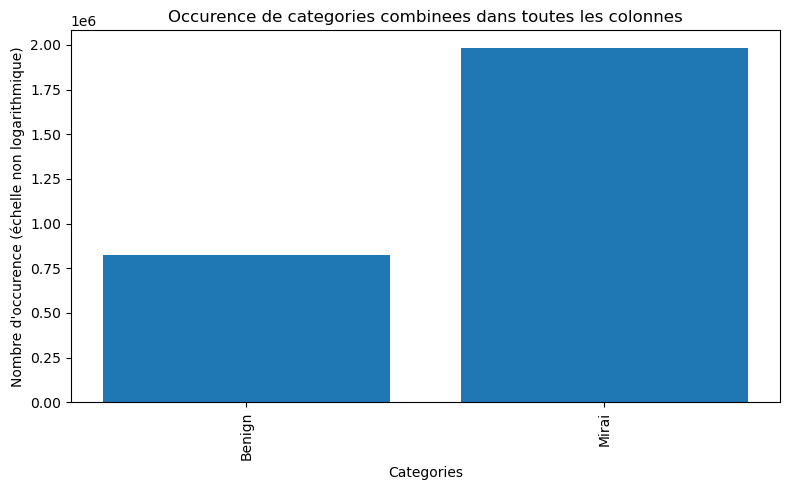

In [4]:
train_sets, test_sets = get_train_and_test_files(path_to_datasets=file_path)
print(len(train_sets) + len(test_sets))

plot_bar_chart(count_label(train_sets, file_path=file_path), 'Occurence de categories combinees dans toutes les colonnes', 'Categories', 'Nombre d\'occurence', 8, 5, log_scale=False)

## Define variables

In [4]:
performance_path = 'performance.csv'
file_path = '.\Files\\Mirai\\'
model_path_binary = '.\\Mirai_model\\Binary\\'
local_path = '.\\Mirai_model\\'
model_path_all_classes = '.\\Mirai_model\\All_classes\\'
after_build_csv = 'after_build_set_scaled.csv'

# Get path data
build_sets, after_build_sets = get_train_and_test_files(path_to_datasets=file_path)
print(len(build_sets) + len(after_build_sets))

# Get build datasets
build_nb = round(len(build_sets) * 0.8)
train_sets = build_sets[:build_nb]
# train_sets = train_sets[: round(len(train_sets) * 0.5)]
test_sets = build_sets[build_nb:]
# test_sets = test_sets[: round(len(test_sets) * 0.5)]

# Define different columns
X_columns = x_columns(read_csv_file(train_sets[0], path_to_datasets=file_path))
print(len(X_columns))
X_columns = X_columns[:-1]
y_column = 'label'
z_column = 'Binary'

13
47


## First model (Binary (Recon or Benigh))

### Building model

In [5]:
simpleModelsDef = [
    {
        "Name": "DT",
        "Model": DecisionTreeClassifier(random_state = 42)
    },
    {
        "Name": "RF",
        "Model": RandomForestClassifier(random_state = 42)
    },
    {
        "Name": "ET",
        "Model": ExtraTreesClassifier(random_state = 42)
    },
    {
        "Name": "XGB",
        "Model": XGBClassifier(random_state = 42)
    },
    {
        "Name": "Cat",
        "Model": CatBoostClassifier(random_state = 42, verbose = 0)
    },
    {
        "Name": "LIGHT",
        "Model": LGBMClassifier(random_state = 42, verbose = 0)
    },
    {
        "Name": "GBoost",
        "Model": GradientBoostingClassifier(random_state = 42)
    },
    {
        "Name": "Adaboost",
        "Model": AdaBoostClassifier(random_state = 42)
    },
    {
        "Name": "MLP",
        "Model": MLPClassifier(hidden_layer_sizes = (100,20), max_iter = 300, activation = 'relu', solver = 'adam', random_state = 42)
    },
]

In [ ]:
# Import or define encoder and performance dataframe
encoder = get_or_define_encoder(model_path_binary)
performance = get_or_define_performance_df(model_path_binary, performance_path)

# Buidling models
for model in tqdm(simpleModelsDef):
    # Build model
    performance, encoder = build_model_multifiltered(model['Model'], model['Name'], train_sets, test_sets, file_path, performance, model_path_binary, X_columns=X_columns, y_column=z_column, encoder=encoder, scaler=scaler, confusionMatrix=False)

    # Save performance
    performance.to_csv(model_path_binary + performance_path, index=False)

# Save the encoder to a file
joblib.dump(encoder, model_path_binary+'encoder.joblib')

#### Feature Importance

100%|██████████| 8/8 [00:00<00:00, 528.78it/s]


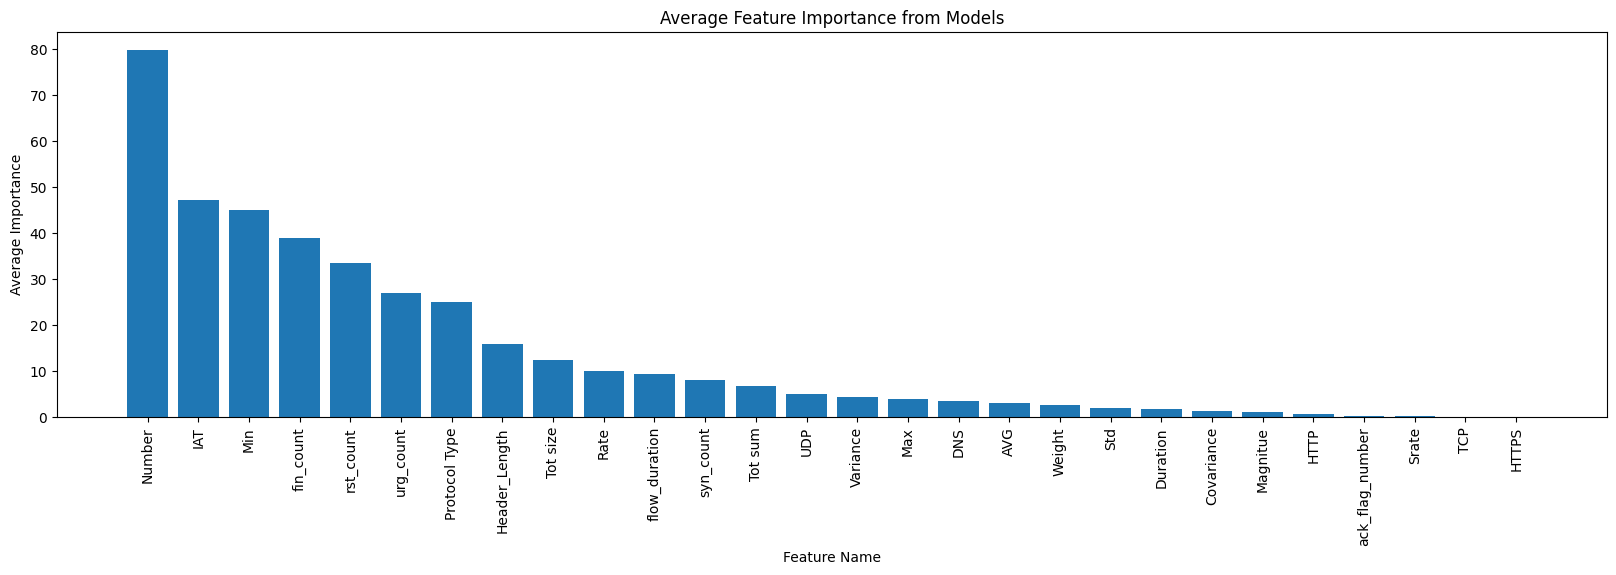

,Feature,Average Importance
40,Number,79.824767
39,IAT,47.288554
34,Min,44.947146
16,fin_count,38.876075
18,rst_count,33.456116
17,urg_count,27.066007
2,Protocol Type,24.945106
1,Header_Length,15.761416
38,Tot size,12.380480
4,Rate,10.000156


In [6]:
# Import encoder and get all features
encoder = get_encoder(model_path_binary, "Please, build models first")

simpleModelsDef = model_dict_refactor_with_load_model(simpleModelsDef, model_path_binary)

# Get feature importance
average_importance_df = calculate_and_plot_feature_importance(simpleModelsDef, train_sets, X_columns, z_column, X_columns, file_path, fitted_models=True, filter_bool=False, scaler=scaler, encoder=encoder)
average_importance_df.to_csv('.\\resultats\\Mirai\\Binary\\feature_importance.csv', index=False)
average_importance_df.head(average_importance_df.size)

#### Display performance

In [9]:
# Preprocessing if necessary
performance = read_csv_file(performance_path, model_path_binary)
performance = performance.drop(4).reset_index(drop=True)
# performance.insert(0, 'Model', [d['Name'] for d in simpleModelsDef])

performance.head()
# performance.to_csv(model_path_binary + performance_path, index=False)

In [10]:
read_csv_file(performance_path, model_path_binary).sort_values(by=['Total rows', 'Accuracy Testing', 'Recall Testing', 'Precision Testing', 'F1 Testing'], ascending=False).head(20)

,Model,Accuracy Training,Recall Training,Precision Training,F1 Training,Accuracy Testing,Recall Testing,Precision Testing,F1 Testing,FU_rate,FL_rate,FU,FL,Total rows
6,GBoost,1.000000,1.000000,0.999999,0.999999,0.999998,0.999999,0.999997,0.999998,0.000000,0.000002,0,1,625629
7,Adaboost,1.000000,1.000000,1.000000,1.000000,0.999998,0.999999,0.999997,0.999998,0.000000,0.000002,0,1,625629
0,XGB,0.999999,0.999999,0.999998,0.999999,0.999995,0.999993,0.999995,0.999994,0.000003,0.000002,2,1,625629
2,RF,1.000000,1.000000,1.000000,1.000000,0.999994,0.999994,0.999991,0.999992,0.000002,0.000005,1,3,625629
3,ET,1.000000,1.000000,1.000000,1.000000,0.999994,0.999994,0.999991,0.999992,0.000002,0.000005,1,3,625629
4,Cat,0.999985,0.999987,0.999976,0.999982,0.999990,0.999990,0.999987,0.999988,0.000003,0.000006,2,4,625629
5,LIGHT,1.000000,1.000000,1.000000,1.000000,0.999979,0.999981,0.999969,0.999975,0.000005,0.000016,3,10,625629
8,MLP,0.999986,0.999990,0.999977,0.999983,0.999978,0.999984,0.999962,0.999973,0.000000,0.000022,0,14,625629
1,DT,1.000000,1.000000,1.000000,1.000000,0.999727,0.999688,0.999654,0.999671,0.000120,0.000153,75,96,625629


## Do prediction for after build sets

In [5]:
# Define model and import encoder
model = joblib.load(model_path_binary + 'model_XGB.joblib')
encoder = get_encoder(model_path_binary, "Please, build binary model(s) first")

# Get prediction
new_after_build_set, y_test, y_pred, z_test = get_prediction_by_model_s(model, after_build_sets, file_path, X_columns, y_column=z_column, z_column=y_column, scale=True, encode=True, scaler=scaler, encoder=encoder)

# Build new dataframe
new_after_build_set[z_column] = encoder.inverse_transform(y_test)
new_after_build_set['Prediction'] = encoder.inverse_transform(y_pred)
new_after_build_set[y_column] = z_test
count = len(new_after_build_set[new_after_build_set[z_column] != new_after_build_set['Prediction']])

# Save dataframe
new_after_build_set.to_csv(local_path + after_build_csv, index=False)

# Get performance
res = pd.DataFrame([[accuracy_score(y_test, y_pred), recall_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted'), count, count / len(new_after_build_set) * 100,len(new_after_build_set)]], columns=['Accuracy', 'Recall', 'Precision', 'F1', 'Mispredicted count', 'Mispredicted rate', 'Total rows'])

del new_after_build_set

res.head()

100%|██████████| 1/1 [00:01<00:00,  1.09s/it]


,Accuracy,Recall,Precision,F1,Mispredicted count,Mispredicted rate,Total rows
0,0.963103,0.963103,0.962985,0.962626,11161,3.689697,302491


## Second model (All Recon classes)

### Building model

In [7]:
simpleModelsDef = [
    {
        "Name": "DT",
        "Model": DecisionTreeClassifier(random_state = 42)
    },
    {
        "Name": "RF",
        "Model": RandomForestClassifier(random_state = 42)
    },
    {
        "Name": "ET",
        "Model": ExtraTreesClassifier(random_state = 42)
    },
    {
        "Name": "XGB",
        "Model": XGBClassifier(random_state = 42)
    },
    {
        "Name": "Cat",
        "Model": CatBoostClassifier(random_state = 42, verbose = 0)
    },
    {
        "Name": "LIGHT",
        "Model": LGBMClassifier(random_state = 42, verbose = 0)
    },
    {
        "Name": "GBoost",
        "Model": GradientBoostingClassifier(random_state = 42)
    },
    {
        "Name": "Adaboost",
        "Model": AdaBoostClassifier(random_state = 42)
    },
    {
        "Name": "MLP",
        "Model": MLPClassifier(hidden_layer_sizes = (100,20), max_iter = 300, activation = 'relu', solver = 'adam', random_state = 42)
    },
]

In [10]:
filter_name = [
    {'name': 'Mirai', 'type': '='},
]
filter_cols = ['Binary']

In [ ]:
# Import or define encoder and performance dataframe
encoder = get_or_define_encoder(model_path_all_classes)
performance = get_or_define_performance_df(model_path_all_classes, performance_path)

# Buidling models
for model in tqdm(simpleModelsDef):
    # Build model
    performance, encoder = build_model_multifiltered(model['Model'], model['Name'], train_sets, test_sets, file_path, performance, model_path_all_classes, X_columns=X_columns , y_column=y_column, filter_cols=filter_cols, filter_bool=True, filter_name=filter_name, scaler=scaler, encoder=encoder)

    # Save performance
    performance.to_csv(model_path_all_classes + performance_path, index=False)

# Save the encoder to a file
joblib.dump(encoder, model_path_all_classes+'encoder.joblib')

#### Feature Importance

100%|██████████| 8/8 [00:00<00:00, 278.62it/s]


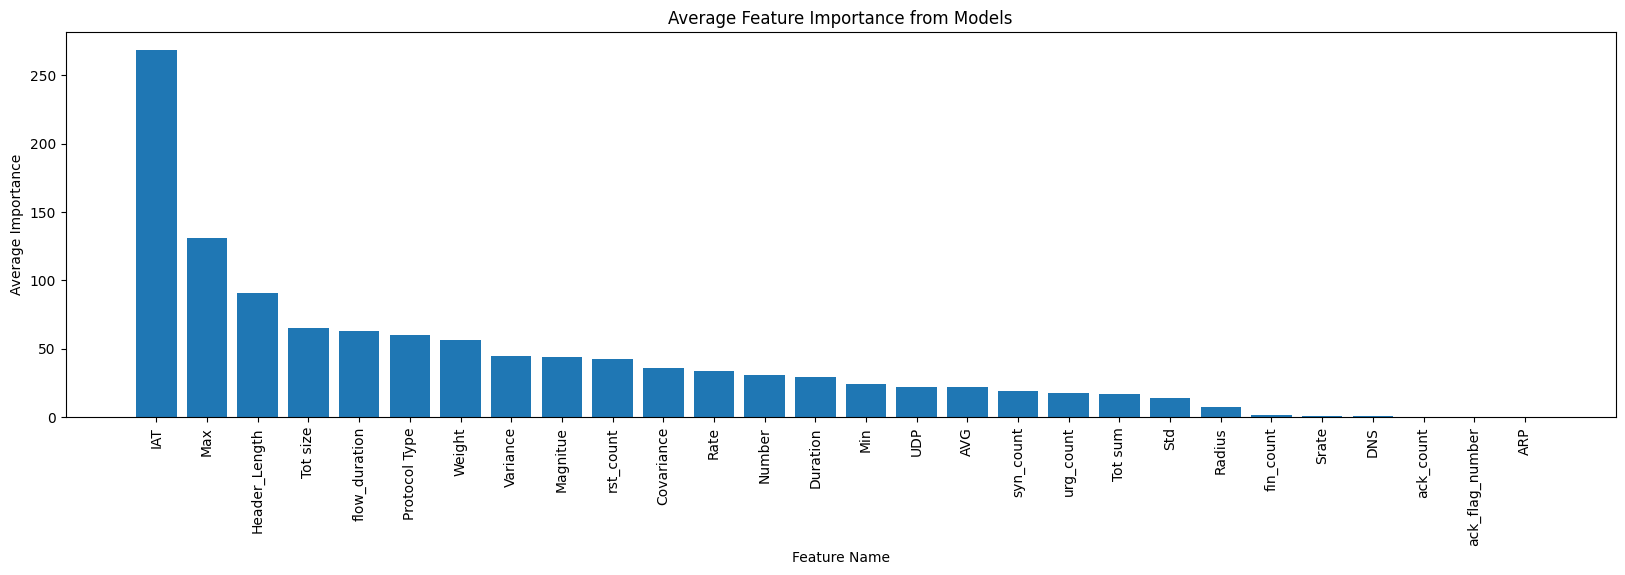

,Feature,Average Importance
39,IAT,268.289930
35,Max,130.876123
1,Header_Length,90.318032
38,Tot size,64.688631
0,flow_duration,62.684768
2,Protocol Type,59.578499
45,Weight,56.323941
44,Variance,44.174673
41,Magnitue,43.898695
18,rst_count,42.649877


In [8]:
# Import encoder and get all features
encoder = get_encoder(model_path_all_classes, "Please, build models first")

simpleModelsDef = model_dict_refactor_with_load_model(simpleModelsDef, model_path_all_classes)

# Get feature importance
average_importance_df = calculate_and_plot_feature_importance(simpleModelsDef, train_sets, X_columns, z_column, X_columns, file_path, fitted_models=True, filter_bool=False, scaler=scaler, encoder=encoder)
average_importance_df.to_csv('.\\resultats\\Mirai\\All_classes\\feature_importance.csv', index=False)
average_importance_df.head(average_importance_df.size)

### Display performance

In [15]:
# Preprocessing if necessary
performance = read_csv_file(performance_path, model_path_all_classes)
performance = performance.drop(4).reset_index(drop=True)
# performance.insert(0, 'Model', [d['Name'] for d in simpleModelsDef])

performance.head()
# performance.to_csv(model_path_all_classes + performance_path, index=False)

In [16]:
read_csv_file(performance_path, model_path_all_classes).sort_values(by=['Total rows', 'Accuracy Testing', 'Recall Testing', 'Precision Testing', 'F1 Testing'], ascending=False).head(20)

,Model,Accuracy Training,Recall Training,Precision Training,F1 Training,Accuracy Testing,Recall Testing,Precision Testing,F1 Testing,FU_rate,FL_rate,FU,FL,Total rows
0,XGB,1.000000,1.000000,1.000000,1.000000,0.999894,0.999895,0.999888,0.999892,0.000068,0.000039,30,17,441424
5,LIGHT,1.000000,1.000000,1.000000,1.000000,0.999891,0.999893,0.999885,0.999889,0.000075,0.000034,33,15,441424
6,GBoost,0.999992,0.999992,0.999992,0.999992,0.999891,0.999893,0.999886,0.999889,0.000077,0.000032,34,14,441424
4,Cat,1.000000,1.000000,1.000000,1.000000,0.999848,0.999849,0.999840,0.999845,0.000097,0.000054,43,24,441424
1,DT,1.000000,1.000000,1.000000,1.000000,0.999801,0.999800,0.999798,0.999799,0.000116,0.000084,51,37,441424
2,RF,1.000000,1.000000,1.000000,1.000000,0.999798,0.999796,0.999793,0.999794,0.000111,0.000091,49,40,441424
3,ET,1.000000,1.000000,1.000000,1.000000,0.996468,0.996560,0.996245,0.996401,0.002363,0.001169,1043,516,441424
7,Adaboost,0.995605,0.995783,0.995215,0.995492,0.996187,0.996160,0.996014,0.996087,0.002177,0.001636,961,722,441424
8,MLP,0.980256,0.979370,0.980149,0.979747,0.977072,0.975538,0.977453,0.976424,0.007976,0.014952,3521,6600,441424


## Final Prediction

In [11]:
# Define model and import encoder
model = joblib.load(model_path_all_classes + 'model_XGB.joblib')
encoder = get_encoder(model_path_all_classes, "Please, build binary model(s) first")

# Get binary col to include it into the new df
pred_column = 'Prediction'
binary_col = get_col_in_csv(after_build_csv, model_repo, z_column, pred_column, filter_name, filter=True, verbose=True)

# Get prediction
new_after_build_set, y_test, y_pred, z_test = get_prediction_by_model_s(model, [after_build_csv], model_repo, X_columns, y_column=y_column, z_column=pred_column, filter_bool=True, filter_name=filter_name, scale=True, encode=False, scaler=scaler, encoder=encoder)

# Build new dataframe and save it
new_after_build_set[y_column] = y_test
new_after_build_set['Final Prediction'] = encoder.inverse_transform(y_pred)
new_after_build_set[z_column] = binary_col
new_after_build_set['Prediction'] = z_test
count = len(new_after_build_set[new_after_build_set[y_column] != new_after_build_set['Final Prediction']])
y_pred = encoder.inverse_transform(y_pred)

# Get performance
res = pd.DataFrame([[accuracy_score(y_test, y_pred), recall_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted'), count, count / len(new_after_build_set),len(new_after_build_set)]], columns=['Accuracy', 'Recall', 'Precision', 'F1', 'Mispredicted count', 'Mispredicted rate', 'Total rows']).head()

res.head()

Dataframe length: 302491.
After reduction dataframe length: 68920.


100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


,Accuracy,Recall,Precision,F1,Mispredicted count,Mispredicted rate,Total rows
0,0.88372,0.88372,0.847486,0.864784,8014,0.11628,68920


In [12]:
labelBenignTraffic = new_after_build_set[
    (new_after_build_set['label'] == 'BenignTraffic') &
    (new_after_build_set['Final Prediction'] != 'BenignTraffic')
]
FinalBenighTraffic = new_after_build_set[
    (new_after_build_set['label'] != 'BenignTraffic') &
    (new_after_build_set['Final Prediction'] == 'BenignTraffic')
]
GoodBenignTraffic = new_after_build_set[
    (new_after_build_set['label'] == 'BenignTraffic') &
    (new_after_build_set['Final Prediction'] == 'BenignTraffic')
]

del new_after_build_set

In [13]:
print(len(labelBenignTraffic), len(FinalBenighTraffic), len(GoodBenignTraffic))

2896 0 0
